# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

### Filter out irrelevant columns

In [92]:
df_filtered = df.drop(columns=["WaterworksName"])
df_filtered

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,15.217089,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,28.970630,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,NaN,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,60.686602,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,19.339643,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,25.079249,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Columns containing missing values

In [93]:
# Calculate the percentage of missing values in each column
missing_percentage = df_filtered.isna().mean() * 100
sorted = missing_percentage.sort_values(ascending=False)

print("Percentage of missing values in each column:")
print(sorted)

Percentage of missing values in each column:
UniformityCoefficient        64.556962
SumOfld_layer                49.367089
TotalEBCT                    49.367089
AverageFilterBedVolume       43.037975
OverallFilterGrainSizeMin    43.037975
OverallFilterGrainSizeMax    43.037975
AverageTotalFilterDepth      41.772152
TankExploitation             37.974684
HLR_BW                       34.177215
Stage1HLR                    26.582278
MaxTypicalFlow               20.253165
FilterExploitation           20.253165
BW%                          16.455696
AverageBackwashVolume        12.658228
UFRV                          8.860759
TankCapacity                  5.063291
Footprint                     5.063291
AverageFilterArea             5.063291
AverageTypicalRunVolume       2.531646
GravityPressureMixed          0.000000
Stages                        0.000000
TotalFilters                  0.000000
OxygenFactor                  0.000000
AerationType                  0.000000
PrimaryTrigger     

#### Removing columns with too many N/A values
We chose a threshhold percentage of 30%, and chose to remove all columns that had a higher N/A % than this.

#### Detect outliers

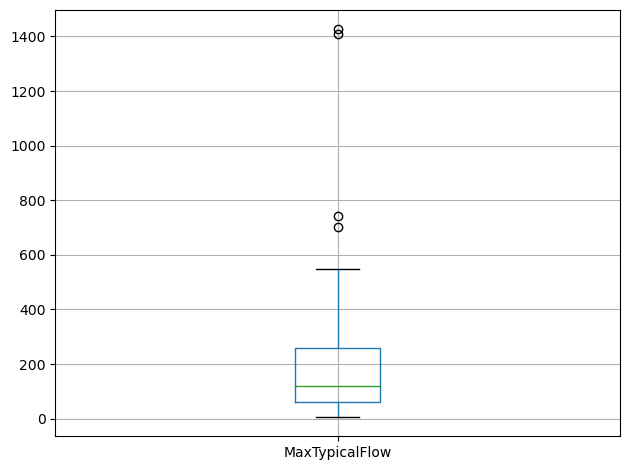

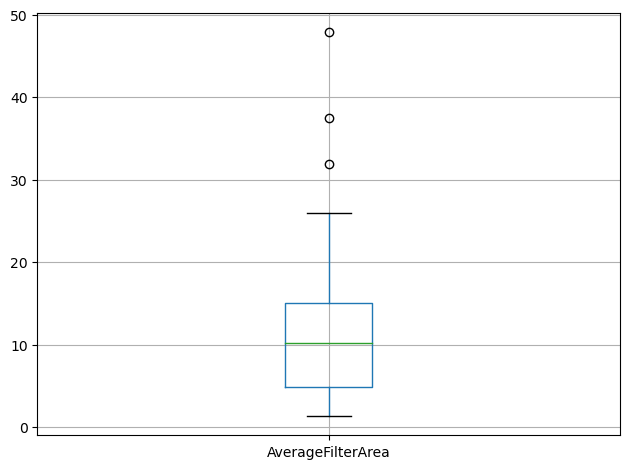

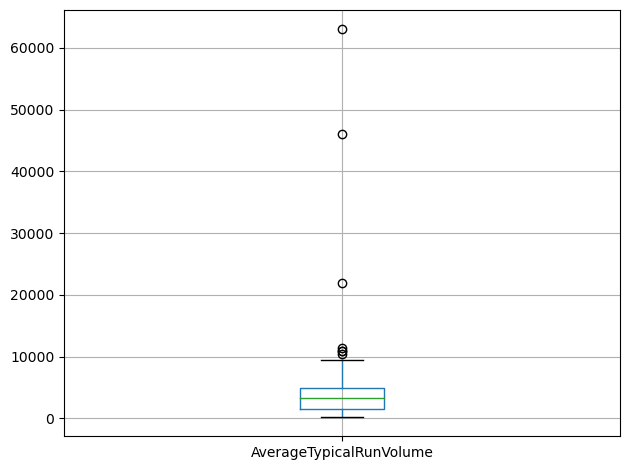

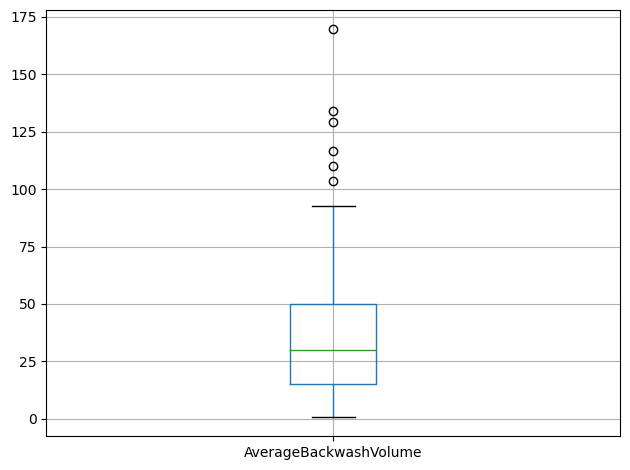

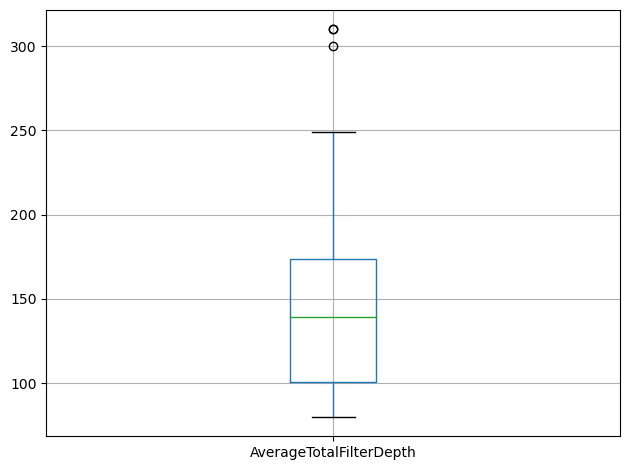

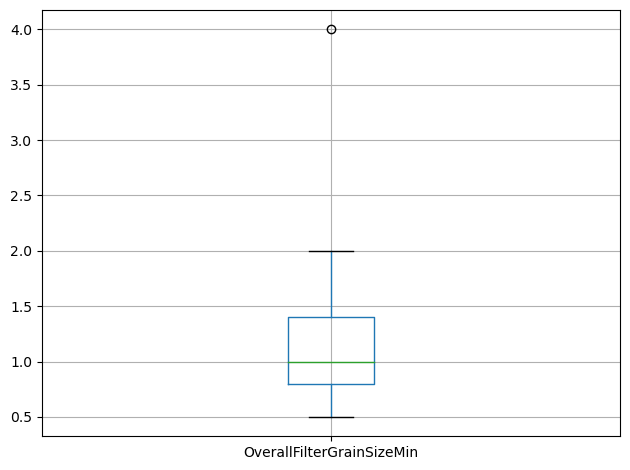

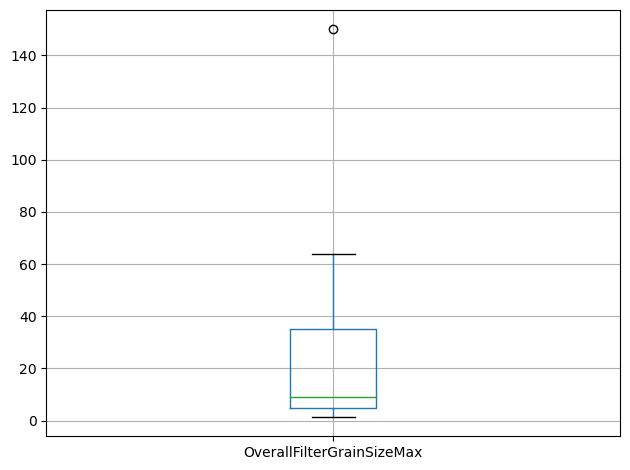

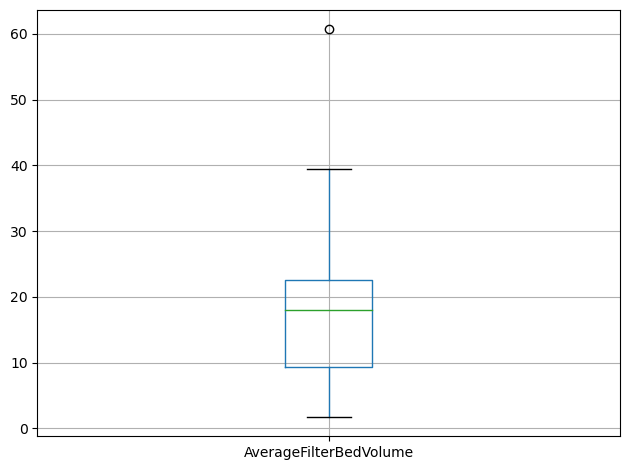

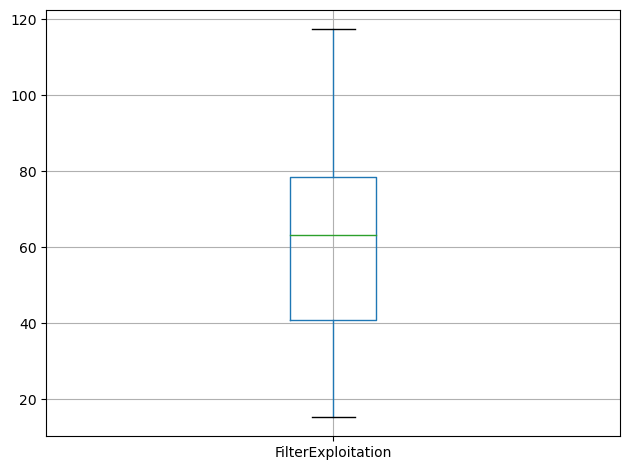

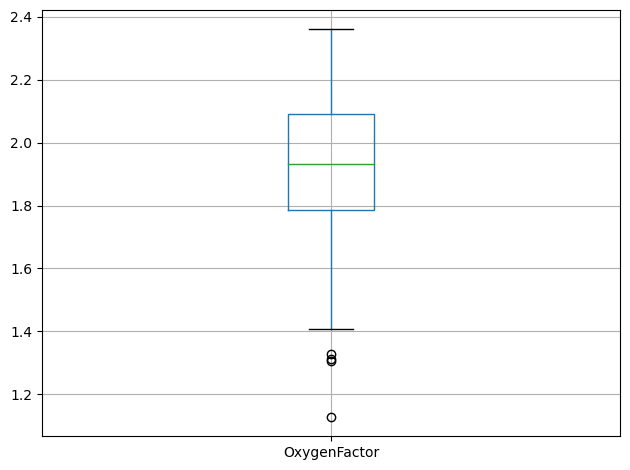

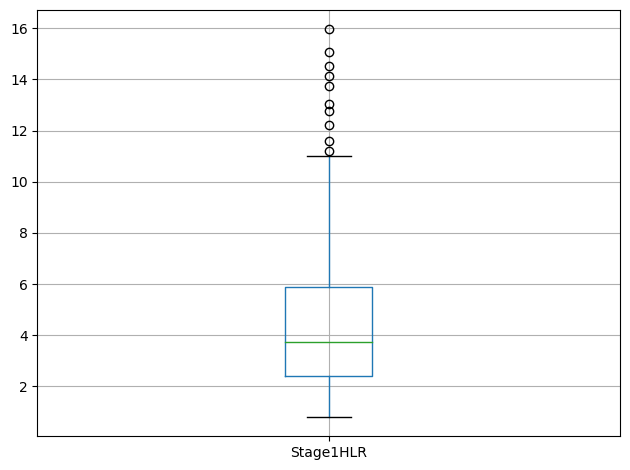

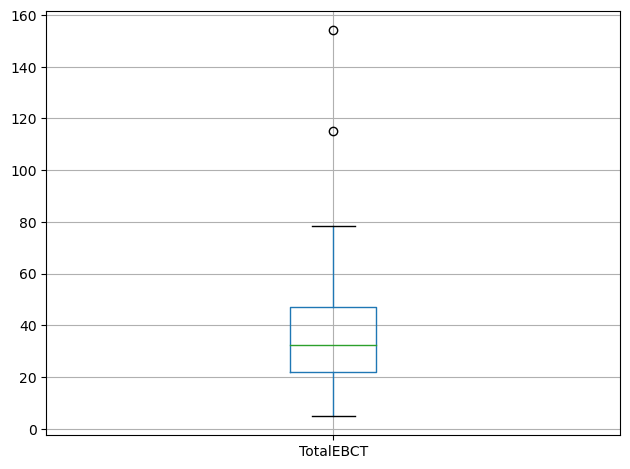

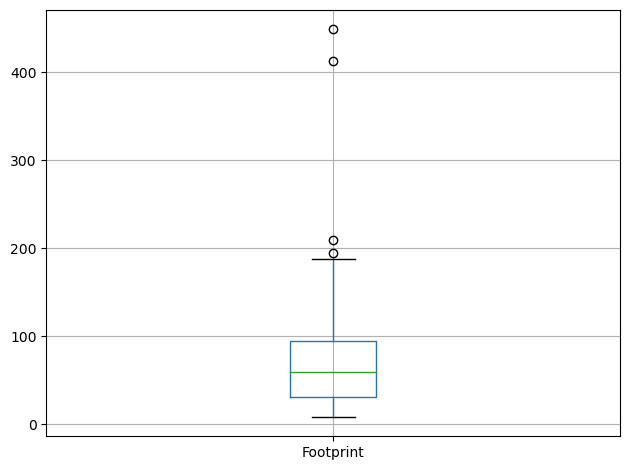

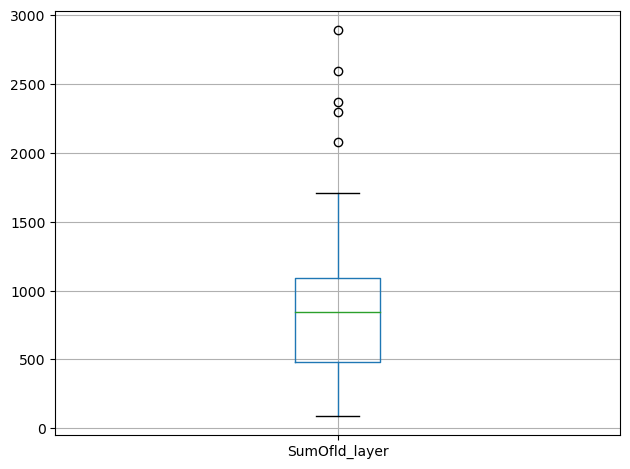

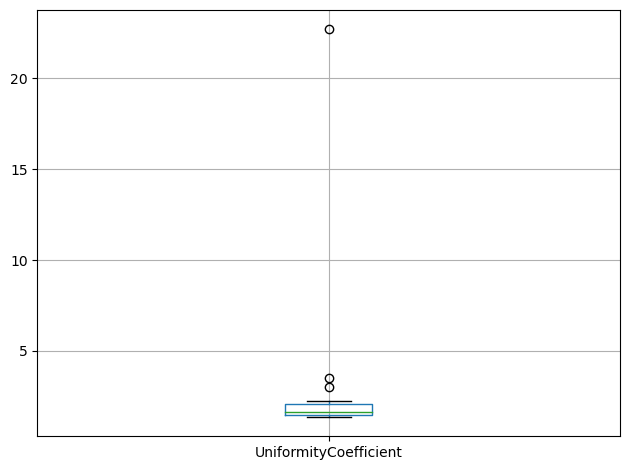

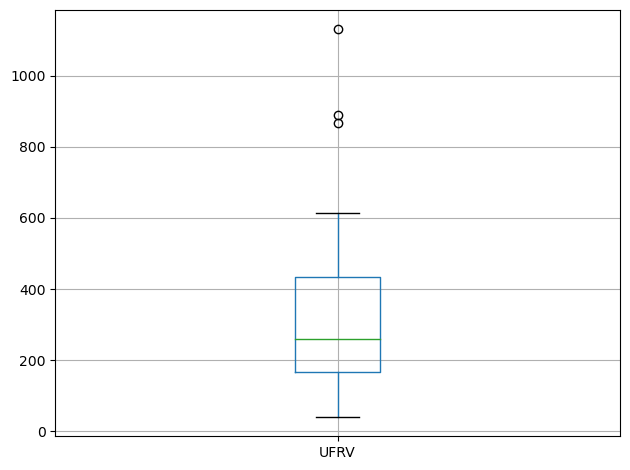

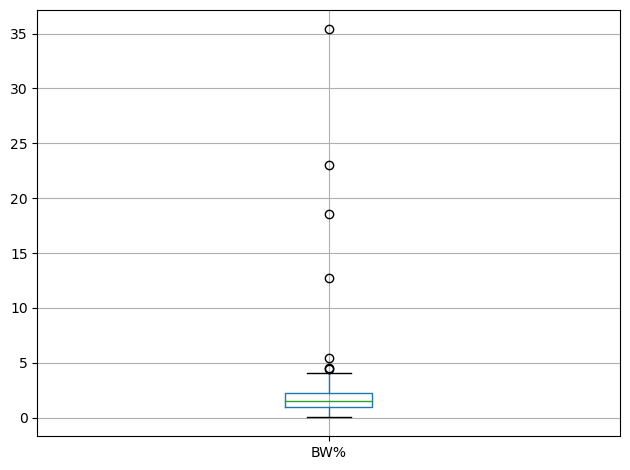

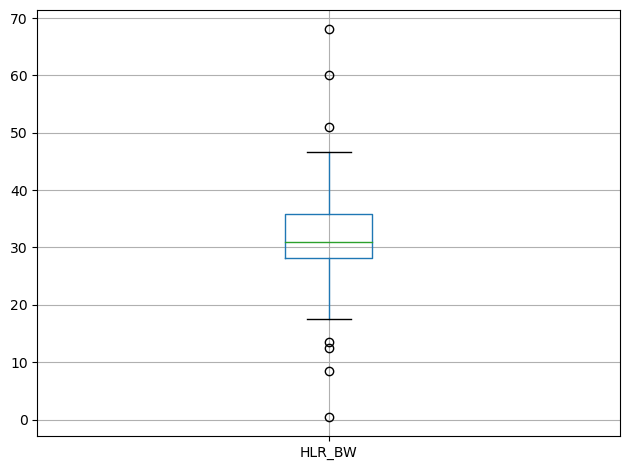

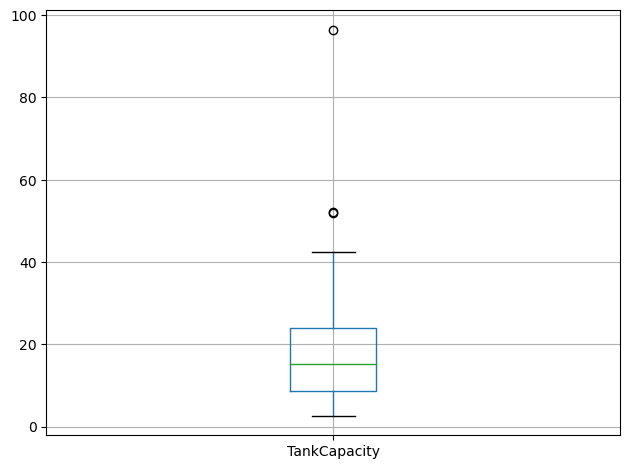

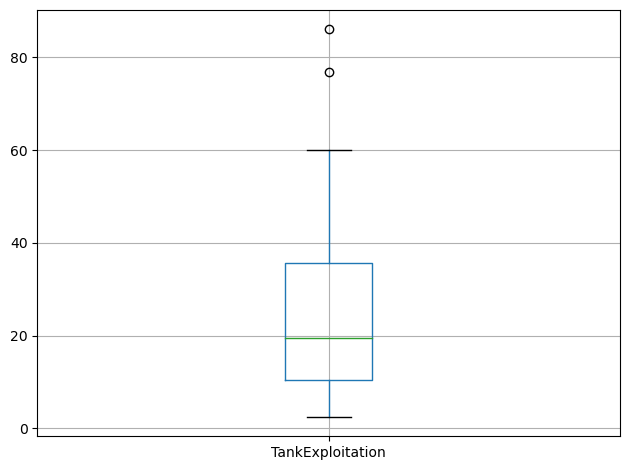

In [94]:
# For each numerical column, make a boxplot
for column in df_filtered:
    if df_filtered[column].dtype == "float64":
        df_filtered.boxplot(column=column)
        # Make the plot thinner
        plt.tight_layout()
        plt.show()

## Thoughts on the outliers

Looking at the boxplots, we see that there are some extreme cases of outliers in for example: BW%, UniformityCoefficient, Tankcapacity,AverageTypicalRunVolume. 

Looking at the pros and cons for removing these outliers; 
#### Pros 
- The data will be more normally distributed, which could be a perk for making a more predictive model of the larger portion of the data.
#### Cons
- We may be removing data that is there for a reason, maybe some of the outliers are actually just large waterworks, that have different characteristics than the smaller ones.
- We already have a relatively small dataset, and removing outliers will make it even smaller.

#### Possible alternatives to removing the outliers.
- We could transform the data, for example by taking the log of the data, or by using a square root transformation. This would make the data more normally distributed, and could be a good alternative to removing the outliers.


#### Conclusion
We have chosen to keep the outliers, this is because we have a smaller dataset, and we do not possess enough domain knowledge to know whether the outliers are there for a reason. We will however keep in mind that the data is not normally distributed, and we will keep this in mind when we're looking at scaling/transforming the data in the future.

## Encoding

### Nominal
By analyzing the datatypes, without any domain knowledge we assume that the following columns are nominal, and should be one-hot encoded.

#### "Primary Trigger"

In [95]:
# Count each unique value in the column 'Primary Trigger', with their count
print("Unique values in the column 'Primary Trigger':")
print(df_filtered["PrimaryTrigger"].value_counts())

Unique values in the column 'Primary Trigger':
PrimaryTrigger
Volume                     58
Time                       19
Waterlevel above filter     1
Mix                         1
Name: count, dtype: int64


The Primary Trigger is assumed to be a categorial variable, with the values; "Time", "Volume", "Waterlevel above filter", "Mix"

With only 1 instance of "Mix" and "Waterlevel above filter".  We chose to remove both of these columns, since we don't have enough data to make any predictions on these. They will be imputed with the mode of the feature.

In [96]:
# Replace "Waterlevel above filter" and "Mix" with the mode of the column
df_filtered["PrimaryTrigger"] = df_filtered["PrimaryTrigger"].replace("Waterlevel above filter", df_filtered["PrimaryTrigger"].mode()[0])
df_filtered["PrimaryTrigger"] = df_filtered["PrimaryTrigger"].replace("Mix", df_filtered["PrimaryTrigger"].mode()[0])
print(df_filtered["PrimaryTrigger"].value_counts())

PrimaryTrigger
Volume    60
Time      19
Name: count, dtype: int64


#### "Aeration type"

In [97]:
#Count each unique value in the column 'AerationType', with their count
print("Unique values in the column 'AerationType':")
print(df_filtered["AerationType"].value_counts())

# Hightlight the values that have less than 5% of the total count
print("Values that have less than 5% of the total count:")
aeration_type_count = df_filtered["AerationType"].value_counts()
mask = aeration_type_count < 0.05 * aeration_type_count.sum()
print(aeration_type_count[mask])

Unique values in the column 'AerationType':
AerationType
Bottom aeration          28
Cascade                  26
Air injection            12
Pure oxygen injection     6
Passive plate aerator     4
No primary aeration       1
Other                     1
Inka                      1
Name: count, dtype: int64
Values that have less than 5% of the total count:
AerationType
No primary aeration    1
Other                  1
Inka                   1
Name: count, dtype: int64


The Aeration type is assumed to be a categorial variable, with the values; "Cascade", "Air Injection", "Bottom aeration", "Pure OxygenInjection". etc...

However, there is a case here with three Values that only occur one time; "No Primary Aeration", "Other", "Inka". Since there is no clear mode of the feature, and that there are multiple values with only one occurance. We have decided to group them into a new category called "Other".

In [98]:
# Group "No primary aeration", "Other" and "Inka" categories into a single category called "Other"
df_filtered["AerationType"] = df_filtered["AerationType"].replace("No primary aeration", "Other")
df_filtered["AerationType"] = df_filtered["AerationType"].replace("Other", "Other")
df_filtered["AerationType"] = df_filtered["AerationType"].replace("Inka", "Other")
print(df_filtered["AerationType"].value_counts())

AerationType
Bottom aeration          28
Cascade                  26
Air injection            12
Pure oxygen injection     6
Passive plate aerator     4
Other                     3
Name: count, dtype: int64


#### "GravityPressureMixed"

In [99]:
#Count each unique value in the column 'GravityPressureMixed', with their count
print("Unique values in the column 'GravityPressureMixed':")
print(df_filtered["GravityPressureMixed"].value_counts())

Unique values in the column 'GravityPressureMixed':
GravityPressureMixed
Gravity     52
Pressure    25
Mixed        2
Name: count, dtype: int64


In this situation, only 2 instances of "Mixed" are present. Based upon the following arguments, we have decided to remove the "Mixed" category, and impute the missing values with the mode of the feature.

- We only have 2 instances of "Mixed", which is not enough to make any predictions on.
- There is a clear mode of the feature, which is "Gravity".

However, we contemplated having two features. "Gravity" and "Pressure", and the "Mixed" instances would be both. Since we are pretty sure we can deduct that "Mixed" must be a combination of the two. 

In [100]:
# Change all "Mixed" values to be "Gravity"
df_filtered["GravityPressureMixed"] = df_filtered["GravityPressureMixed"].replace("Mixed", "Gravity")
print(df_filtered["GravityPressureMixed"].value_counts())

GravityPressureMixed
Gravity     54
Pressure    25
Name: count, dtype: int64


### Ordinal
These features are assumed to be ordinal, and will be OrdinalEncoded.
#### "Stages"

In [101]:
# # Count each unique value in the column 'Stages', with their count
print("Unique values in the column 'Stages':")
print(df_filtered["Stages"].value_counts())

Unique values in the column 'Stages':
Stages
Single    40
Double    37
Mixed      1
Triple     1
Name: count, dtype: int64


In this situation, since we have an ordinal feature at hand. We will OrdinalEncode the feature. Keeping Triple as a category. And imputing "Mixed" to be the mode of the feature.

In [102]:
# Replace "Mixed" with the mode of the column
df_filtered["Stages"] = df_filtered["Stages"].replace("Mixed", df_filtered["Stages"].mode()[0])
print(df_filtered["Stages"].value_counts())

Stages
Single    41
Double    37
Triple     1
Name: count, dtype: int64


In [103]:
categorical_cols = ["PrimaryTrigger","AerationType","GravityPressureMixed"]
ordinal_cols= ["Stages"]

transformer = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(), categorical_cols),
        ("ordinal", OrdinalEncoder(), ordinal_cols),
    ]
)

# Fit the transformer to the data
df_encoded_cols = transformer.fit_transform(df_filtered)

# Convert the result to a DataFrame
df_encoded_cols = pd.DataFrame(df_encoded_cols, columns=transformer.get_feature_names_out())

df_encoded_cols.head()


,ohe__PrimaryTrigger_Time,ohe__PrimaryTrigger_Volume,ohe__AerationType_Air injection,ohe__AerationType_Bottom aeration,ohe__AerationType_Cascade,ohe__AerationType_Other,ohe__AerationType_Passive plate aerator,ohe__AerationType_Pure oxygen injection,ohe__GravityPressureMixed_Gravity,ohe__GravityPressureMixed_Pressure,ordinal__Stages
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [106]:
# Take the features from df_encoded, and override the features with the same names in df_filtered
df_encoded = df_filtered.drop(columns=categorical_cols + ordinal_cols)
df_encoded = pd.concat([df_encoded, df_encoded_cols], axis=1)

df_encoded.head()


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,FilterExploitation,...,ohe__PrimaryTrigger_Volume,ohe__AerationType_Air injection,ohe__AerationType_Bottom aeration,ohe__AerationType_Cascade,ohe__AerationType_Other,ohe__AerationType_Passive plate aerator,ohe__AerationType_Pure oxygen injection,ohe__GravityPressureMixed_Gravity,ohe__GravityPressureMixed_Pressure,ordinal__Stages
0,6,50.0,6.000000,5200.0,10.0,NaN,NaN,NaN,NaN,57.886530,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4,110.0,4.908739,300.0,28.0,310.0,0.8,5.0,15.217089,63.521586,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4,120.0,15.343900,3800.0,83.3,190.0,2.0,35.0,28.970630,64.908486,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,NaN,16.000000,1200.0,26.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2,NaN,1.495000,250.0,4.5,NaN,1.6,32.0,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Choose scaling method based on the outliers detected

We have chosen to use the RobustScaler, as it is less sensitive to outliers than the StandardScaler.

In [117]:
# For each numerical column, use the RobustScaler to scale the data
scaler = RobustScaler()
df_scaled = df_encoded.copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

df_scaled.head()
        

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,FilterExploitation,...,ohe__PrimaryTrigger_Volume,ohe__AerationType_Air injection,ohe__AerationType_Bottom aeration,ohe__AerationType_Cascade,ohe__AerationType_Other,ohe__AerationType_Passive plate aerator,ohe__AerationType_Pure oxygen injection,ohe__GravityPressureMixed_Gravity,ohe__GravityPressureMixed_Pressure,ordinal__Stages
0,0.2,-0.357170,-0.414662,0.557143,-0.571429,NaN,NaN,NaN,NaN,-0.143105,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.2,-0.051024,-0.522949,-0.842857,-0.057143,2.350515,-0.333333,-0.133333,-0.210526,0.006422,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0
2,-0.2,0.000000,0.512541,0.157143,1.522857,0.701031,1.666667,0.866667,0.829924,0.043223,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,-0.6,NaN,0.577647,-0.585714,-0.114286,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.6,NaN,-0.861697,-0.857143,-0.728571,NaN,1.000000,0.766667,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Create a correlation matrix and discuss

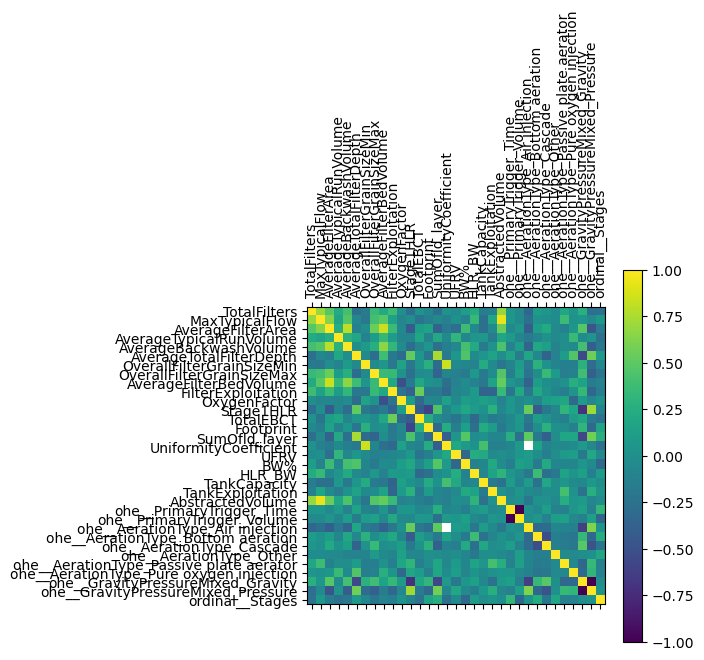

In [119]:
# Make correlation matrix
correlation_matrix = df_scaled.corr()


# Plot the correlation matrix
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [122]:
# Print the names of the most correlated columns
correlation_matrix = correlation_matrix.abs()
correlation_matrix = correlation_matrix.unstack()
correlation_matrix = correlation_matrix.sort_values(ascending=False)
correlation_matrix = correlation_matrix[correlation_matrix < 1]
correlation_matrix = correlation_matrix[correlation_matrix >= 0.8]
correlation_matrix = correlation_matrix[correlation_matrix.index.get_level_values(0) < correlation_matrix.index.get_level_values(1)]
print(correlation_matrix)

AbstractedVolume           MaxTypicalFlow            0.942188
OverallFilterGrainSizeMin  UniformityCoefficient     0.849492
AverageFilterArea          AverageFilterBedVolume    0.838379
AverageBackwashVolume      AverageFilterArea         0.802639
dtype: float64


#### Imputation


#### Consider whether some features should be transformed (e.g. using log, square root etc.)

#### Discuss consequences of a small data-set